In [21]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)

# 1. Install Libraries

# 2. Load Libraries

In [22]:
library(tidyverse)
library(tidymodels)
library(readxl)
library(janitor)
library(plotly)
library(corrr)
library(sjPlot)
library(lmerTest)  # Use lmerTest to get p-values
library(broom.mixed)
#library(forcats)
library(stringr)
library(broom)
library(GGally)
library(ggpubr)
library(patchwork)
library(agricolae)
library(gander)

# 3. Load data

In [23]:
data <- readxl::read_excel("data/All Year 28 R Barley trial data.xlsx", sheet = "Overall_2") %>% 
  clean_names() %>% 
  filter(!(location == "Falher" & year == 2024)) %>% 
  mutate(yield_adj_to_13_5_percent = as.numeric(yield_adj_to_13_5_percent),
         yield_adj_to_13_5_percent_bu = as.numeric(yield_adj_to_13_5_percent_bu),
         avg_height_at_phys_maturity = as.numeric(avg_height_at_phys_maturity),
         lodging_index_1 = as.numeric(lodging_index_1),
         lodging_index_2 = as.numeric(lodging_index_2),
         lodging_index_3 = as.numeric(lodging_index_3),
         tkw_avg_adjusted_to_13_5_percent_moisture = as.numeric(tkw_avg),
         ndf_percent_dm = as.numeric(ndf_percent_dm),
         iv_d_ec_percent_dm = as.numeric(iv_d_ec_percent_dm),
         starch_percent_dm = as.numeric(starch_percent_dm),
         test_weight_kg_h_l = as.numeric(test_weight_kg_h_l),
         protein_percent_dm = as.numeric(protein_percent_dm),
         dtm = as.numeric(dtm),
         grain_moisture_percent = as.numeric(grain_moisture_percent)) %>% 
  mutate(cultivar = case_when(cultivar == "TR18647"~ "AB_Hague",
                              .default = cultivar))
head(data) 

New names:
• `` -> `...41`
Warning message:
“There were 13 warnings in `mutate()`.
The first warning was:
ℹ In argument: `yield_adj_to_13_5_percent =
  as.numeric(yield_adj_to_13_5_percent)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 12 remaining warnings.”


year,location,plot,block,overall_trt_number,cultivar,pgr_trt_number,pgr_trt_name,emerge_avg_plants_m2,week_1_height,⋯,tkw_1_100_kernels,tkw_2_100_kernels,tkw_avg,tkw_avg_adjusted_to_13_5_percent_moisture,protein_percent_dm,starch_percent_dm,ndf_percent_dm,iv_d_ec_percent_dm,x41,gross_return_yield_x_selling_rate_5_85
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,Vermilion,101,1,1,CDC_Austenson,1,No_PGR,139.13043478260869,.,⋯,4.5,4.7,46.0,46.0,12.35137,61.80709,16.94731,3484.369,NA,793.0985
2022,Vermilion,102,1,2,CDC_Austenson,2,M62.5_21-24,136.95652173913044,.,⋯,4.5999999999999996,4.3,44.5,44.5,12.16454,61.71610,16.99448,3492.453,NA,744.2021
2022,Vermilion,103,1,3,CDC_Austenson,3,M62.5_30-32,158.69565217391303,.,⋯,4.8,4.9000000000000004,48.5,48.5,11.94270,60.99495,17.04296,3429.073,NA,685.2741
2022,Vermilion,104,1,4,CDC_Austenson,4,M62.5_37,158.69565217391303,.,⋯,4.5999999999999996,4.8,47.0,47.0,11.90405,61.71217,16.27136,3398.832,NA,1029.5546
2022,Vermilion,105,1,5,CDC_Austenson,5,M125_30-32,210.86956521739128,.,⋯,4.8,4.8,48.0,48.0,12.28261,61.19565,17.06522,3464.130,NA,809.3649
2022,Vermilion,106,1,6,CDC_Austenson,6,M125_37,182.60869565217391,.,⋯,4.5999999999999996,4.5999999999999996,46.0,46.0,12.39285,60.91529,16.46905,3407.598,NA,913.5992


# 4. Data Exploration

In [24]:
theme_nice <- function(){
  theme_bw()+
  theme(axis.title = element_text(size = 20),
        axis.text = element_text(size = 20),
        plot.title = element_text(size = 20),
        strip.text = element_text(size = 18))
}

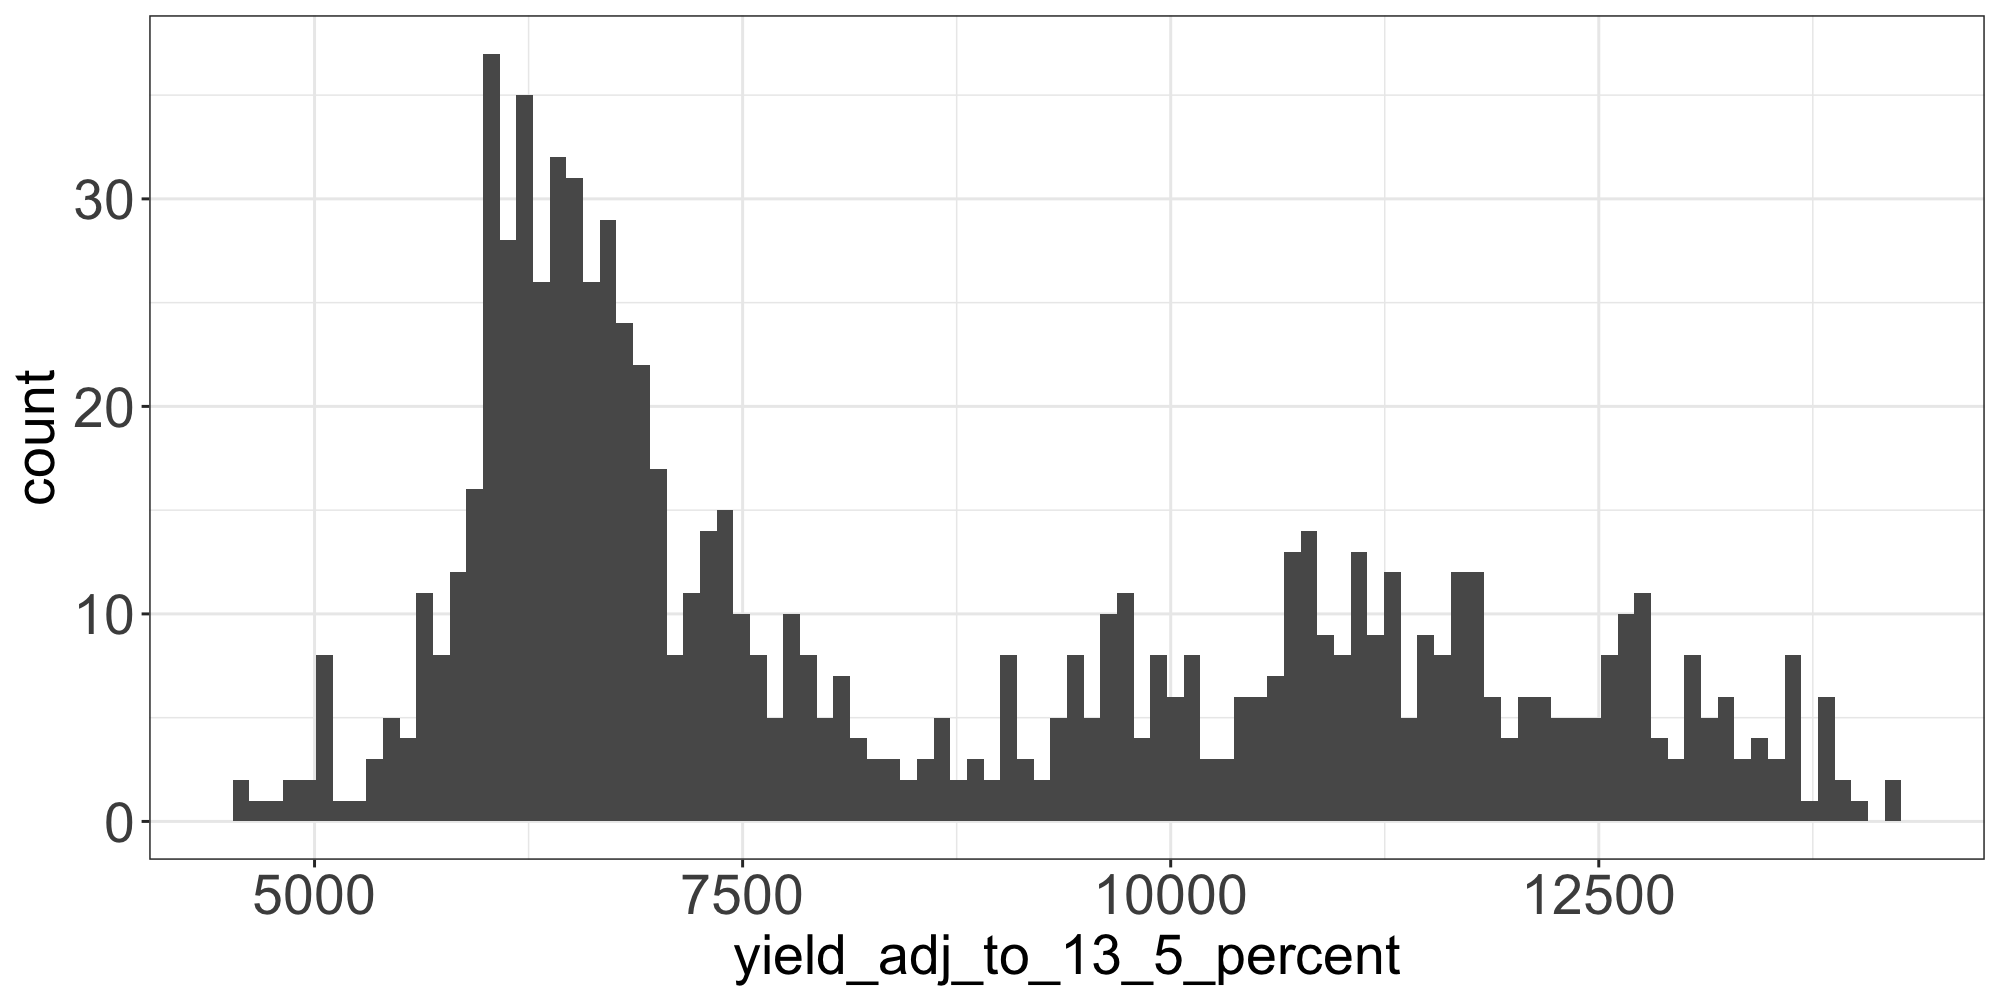

In [25]:
data %>% 
drop_na(yield_adj_to_13_5_percent)%>%
  ggplot(aes(yield_adj_to_13_5_percent))+
  geom_histogram(bins = 100)+
theme_nice()

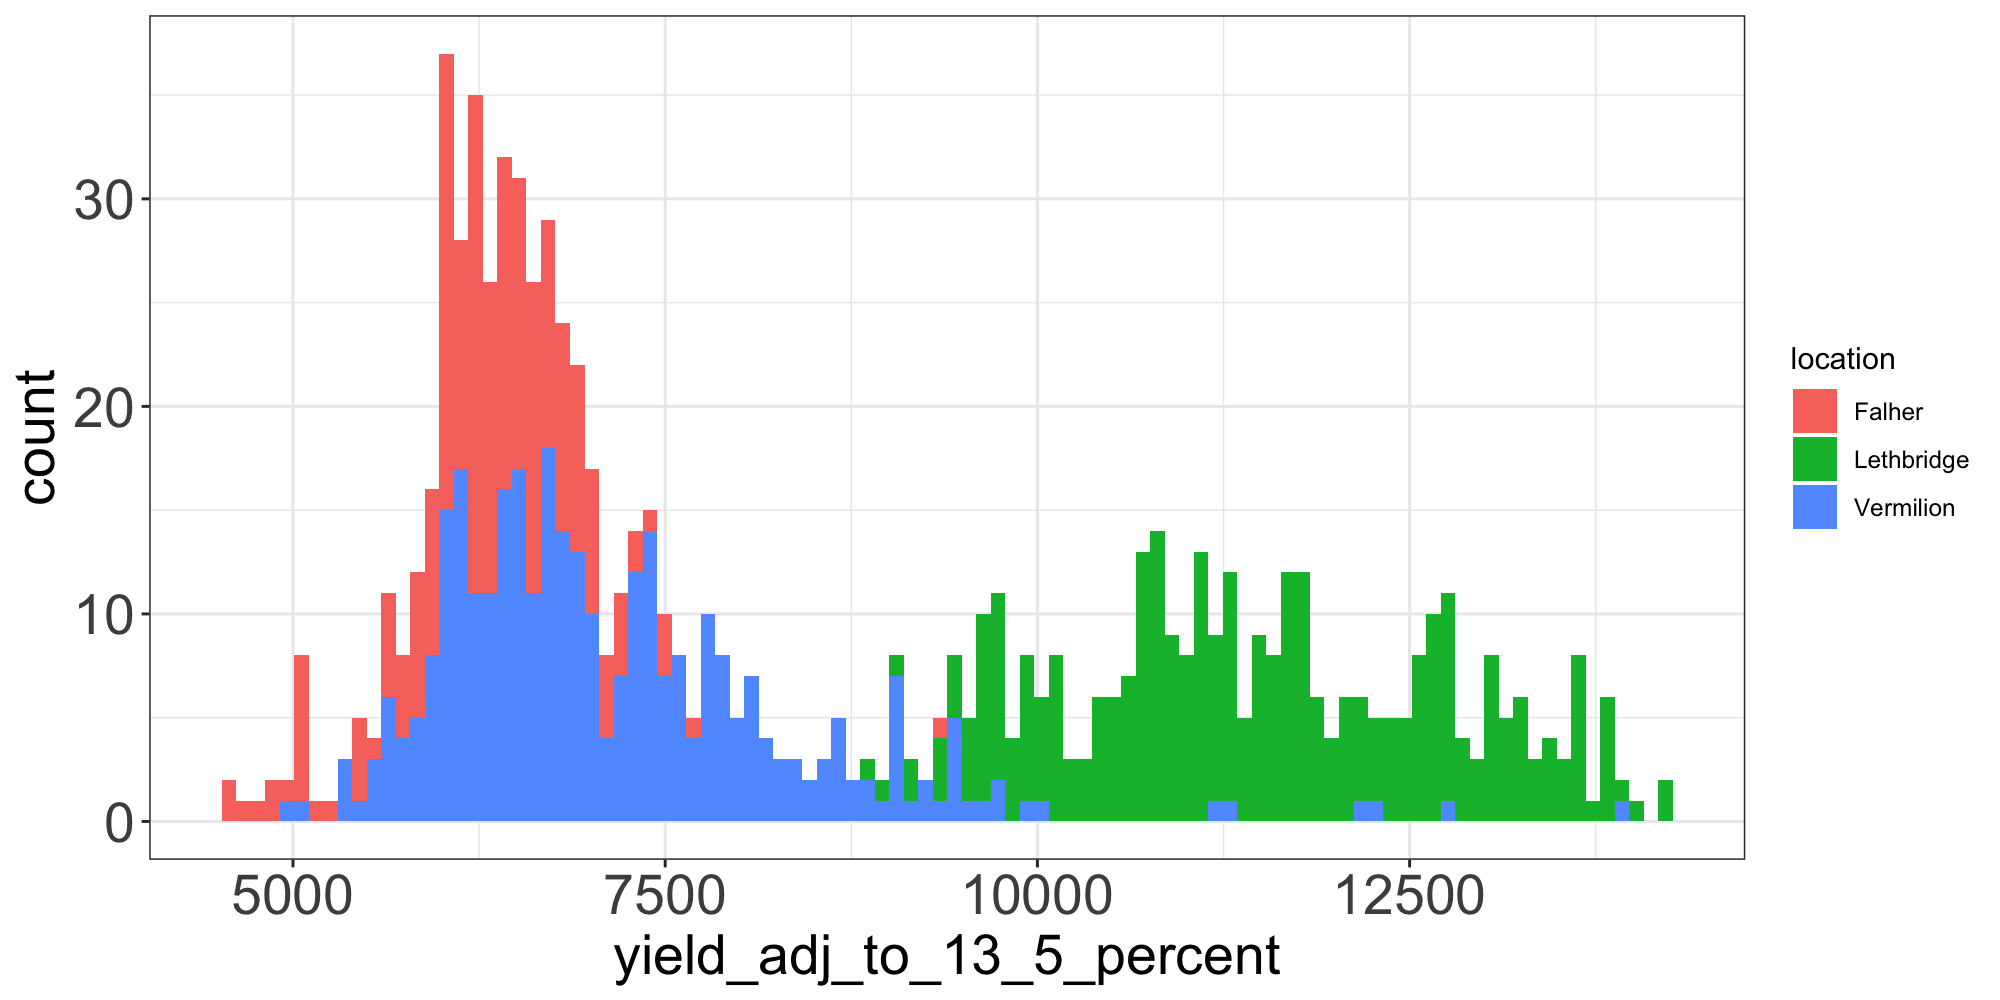

In [26]:
data %>% 
drop_na(yield_adj_to_13_5_percent)%>%
  ggplot(aes(yield_adj_to_13_5_percent, fill = location))+
  geom_histogram(bins = 100)+
theme_nice()

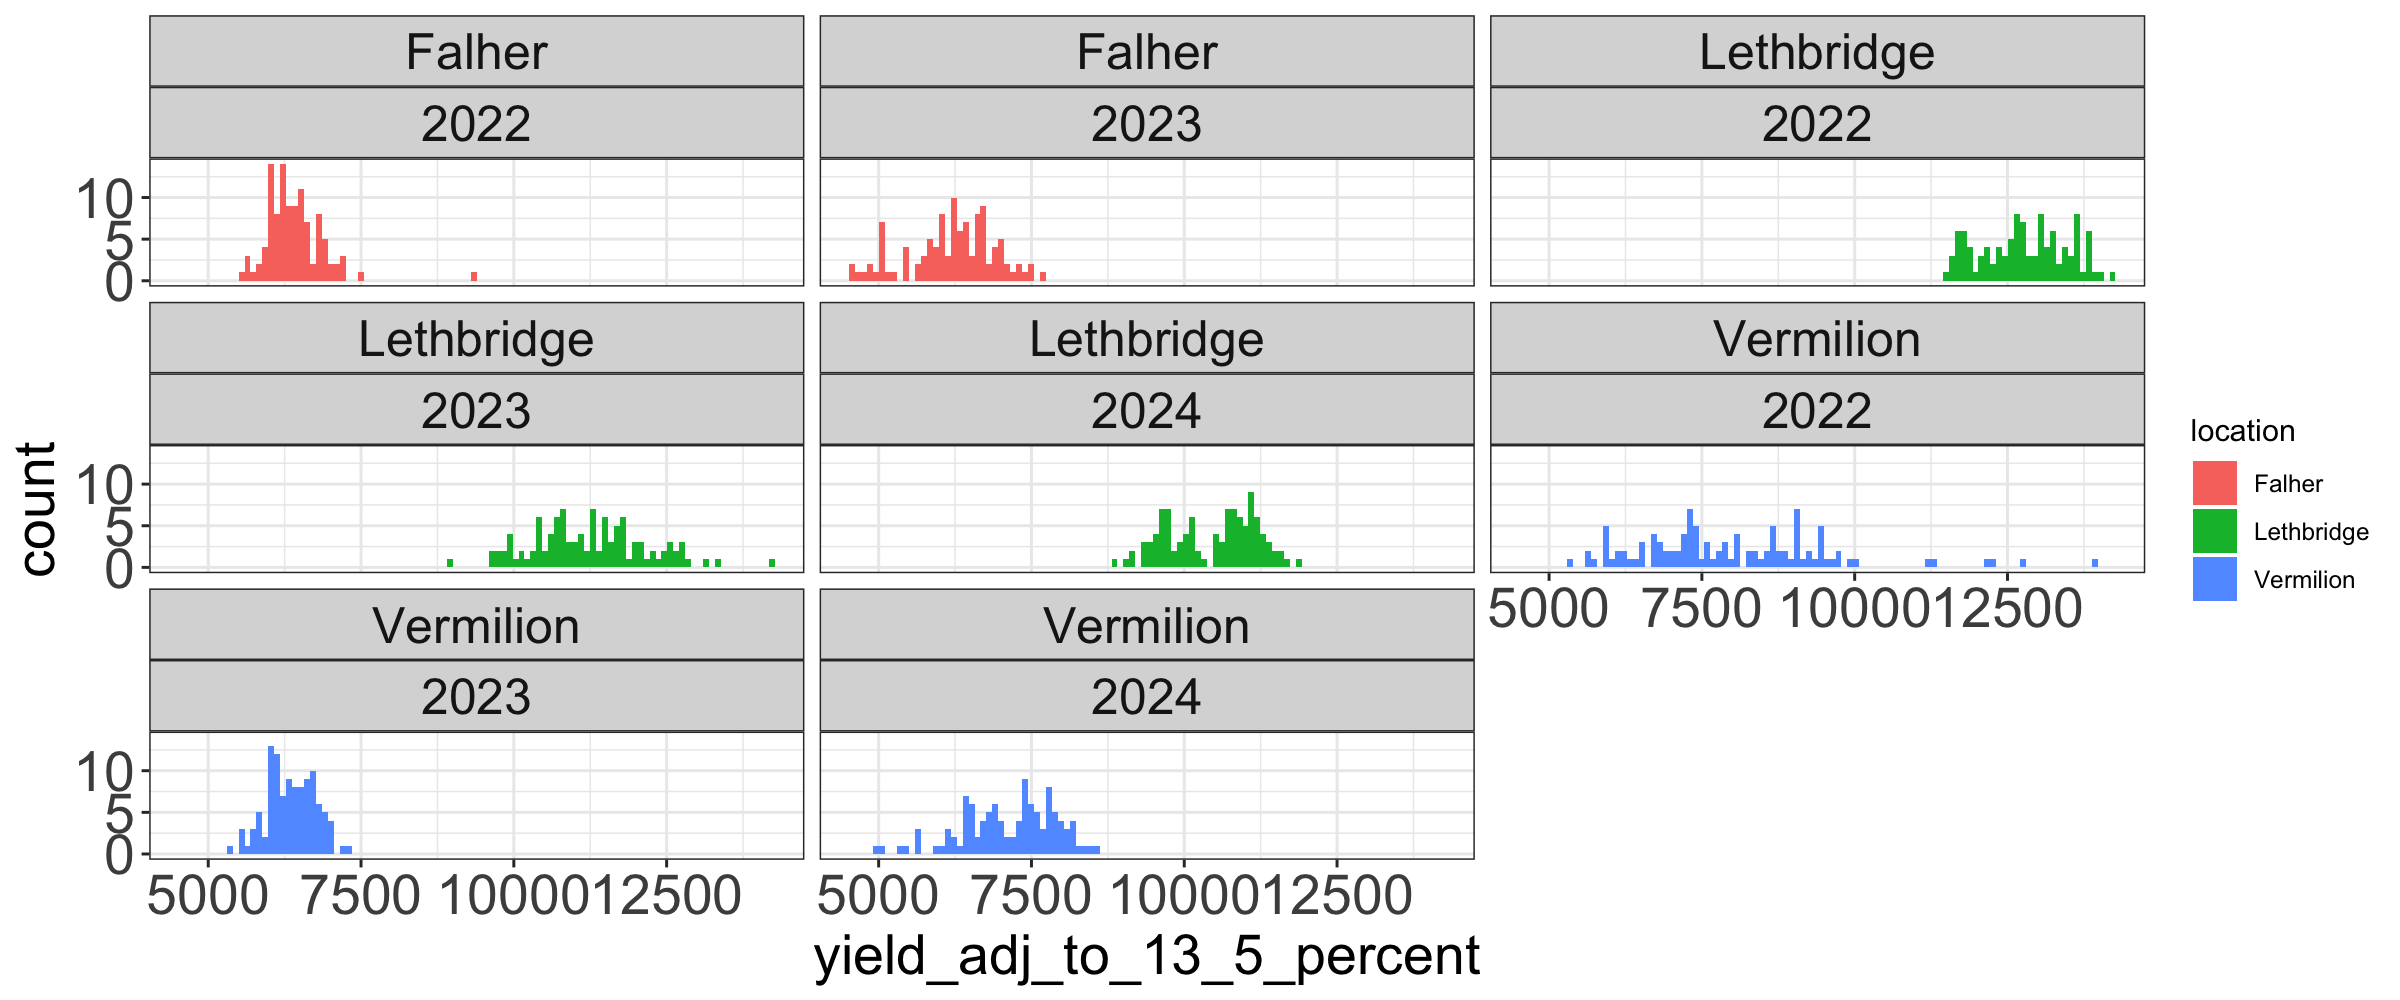

In [27]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
data %>% 
drop_na(yield_adj_to_13_5_percent)%>%
  ggplot(aes(yield_adj_to_13_5_percent, fill = location))+
  geom_histogram(bins = 100)+
  facet_wrap(location ~ year)+
theme_nice()

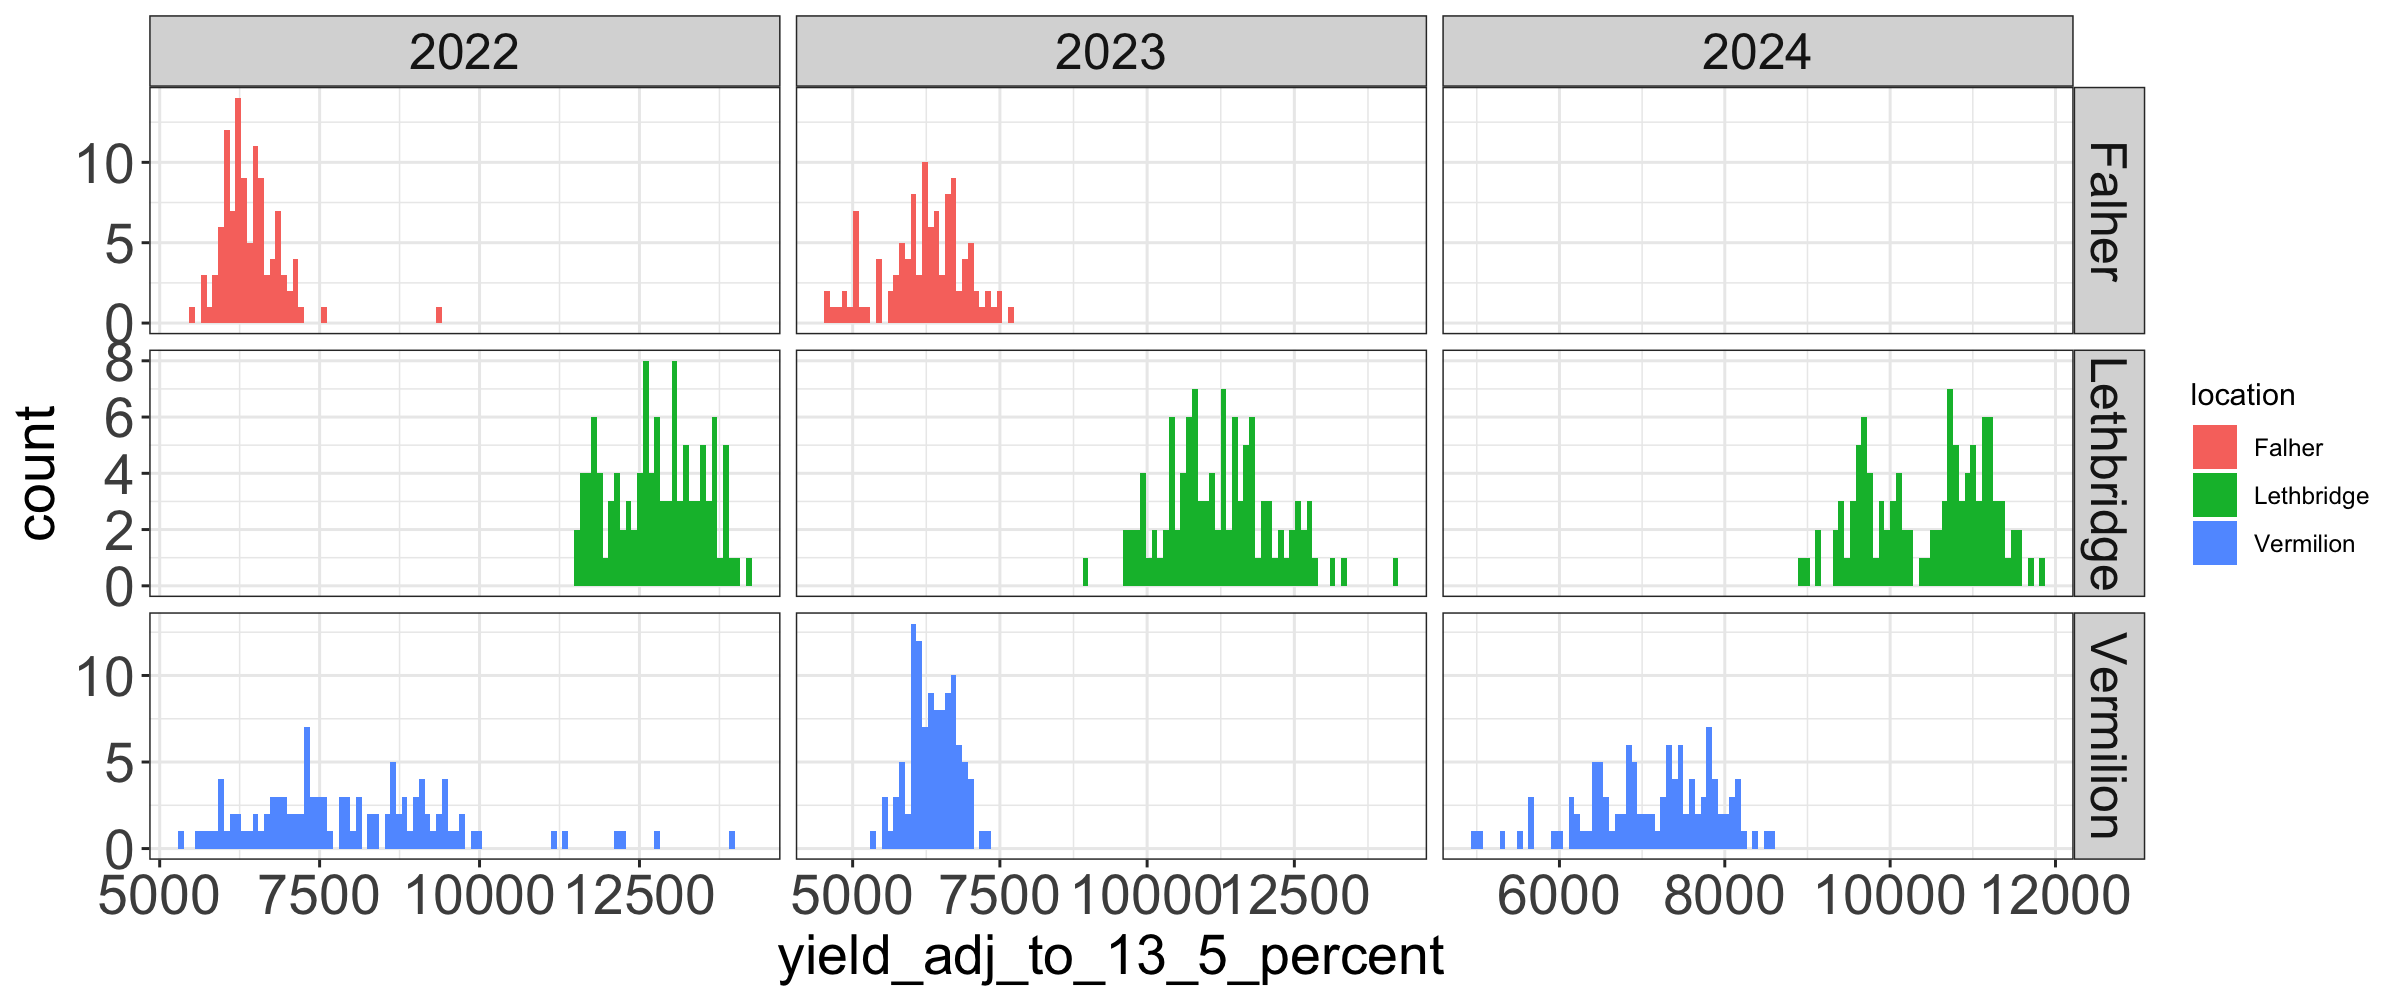

In [28]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
data %>% 
drop_na(yield_adj_to_13_5_percent)%>%
  ggplot(aes(yield_adj_to_13_5_percent, fill = location))+
  geom_histogram(bins = 100)+
  #geom_density(aes(alpha = 0.3))+
  facet_grid(location ~ year, scales = "free")+
theme_nice()

`summarise()` has grouped output by 'cultivar', 'year'. You can override using
the `.groups` argument.


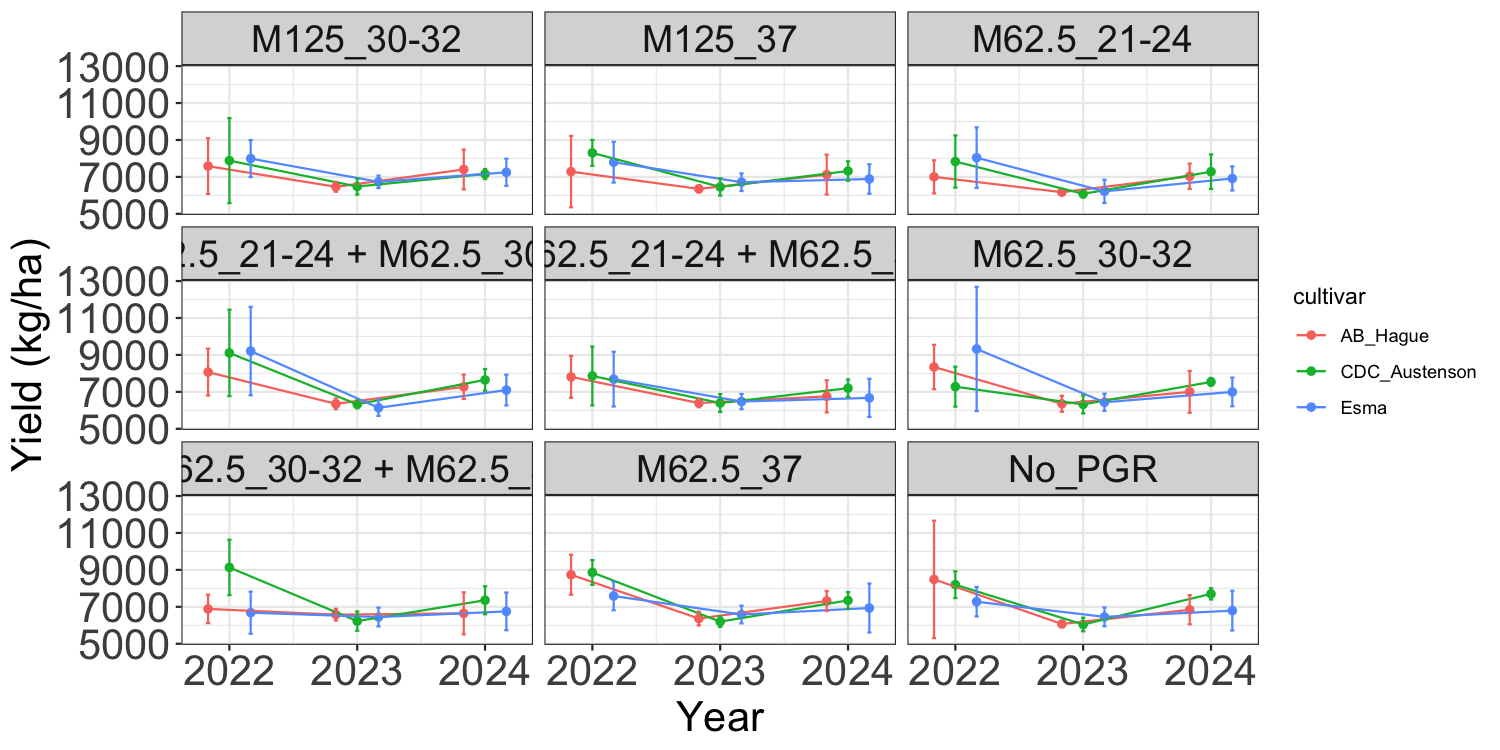

In [29]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 150)
data %>% 
  filter(location == "Vermilion") %>% 
  group_by(cultivar, year, pgr_trt_name) %>% 
  summarise(avg_r = mean(yield_adj_to_13_5_percent, na.rm = TRUE),
            sd_r = sd(yield_adj_to_13_5_percent, na.rm = TRUE)) %>% 
  ggplot(aes(year, avg_r, color = cultivar))+
  facet_wrap(vars(pgr_trt_name))+
  geom_point(position = position_dodge(width = 0.5))+
  geom_line(position = position_dodge(width = 0.5))+
  geom_errorbar(aes(ymin = avg_r - sd_r, ymax = avg_r + sd_r), width = 0.1,
                  position = position_dodge(width = 0.5))+
  scale_x_continuous(breaks = seq(2022, 2024,1))+
  labs(x = "Year", y = "Yield (kg/ha)")+
 theme_nice()

# 5. Data cleaning

In [30]:
cleaned_data_temp <-
  data %>% 
  mutate(lodging_avg = (lodging_index_1 + lodging_index_2 + lodging_index_3) /3) %>% 
  rename(tkw = tkw_avg_adjusted_to_13_5_percent_moisture,
         ndf_percent_af = ndf_percent_dm,
         plant_height_maturity_cm = emerge_avg_plants_m2,
         yield_bu_acre = yield_adj_to_13_5_percent_bu
         ) %>% 
  select("year", "location", "cultivar", "pgr_trt_name",  "yield_bu_acre",
  "lodging_index_3",
  "protein_percent_dm",
  "avg_height_at_phys_maturity",
  "tkw",
  "test_weight_kg_h_l",
  "dtm",
  "ndf_percent_af",
  "iv_d_ec_percent_dm",
  "grain_moisture_percent",
   "starch_percent_dm",
  "yield_adj_to_13_5_percent",
  "lodging_avg",
  "lodging_index_1",
  "lodging_index_2",
  "lodging_index_3")

# 6. Feature engineering

In [31]:
# Create a recipe
rec_1 <- recipe(yield_adj_to_13_5_percent ~ ., data = cleaned_data_temp) %>%
  step_impute_knn(all_predictors(), neighbors = 20)  # use k = 5

# Prep the recipe
rec_prepped_1 <- prep(rec_1)

# Apply the imputation to the full dataset
cleaned_data_imputed_1 <- bake(rec_prepped_1, new_data = NULL) %>% 
  select(-yield_adj_to_13_5_percent)

In [32]:
# Create a recipe
rec_2 <- recipe(yield_bu_acre ~ ., data = cleaned_data_temp) %>%
  step_impute_knn(all_predictors(), neighbors = 20)  # use k = 5

# Prep the recipe
rec_prepped_2 <- prep(rec_2)

# Apply the imputation to the full dataset
cleaned_data_imputed_2 <- bake(rec_prepped_2, new_data = NULL) %>% 
  select(-yield_bu_acre)

In [33]:
cleaned_data_imputed <- cleaned_data_imputed_1 %>% 
  left_join(cleaned_data_imputed_2) 
head(cleaned_data_imputed)

Joining with `by = join_by(year, location, cultivar, pgr_trt_name,
lodging_index_3, protein_percent_dm, avg_height_at_phys_maturity, tkw,
test_weight_kg_h_l, dtm, ndf_percent_af, iv_d_ec_percent_dm,
grain_moisture_percent, starch_percent_dm, lodging_avg, lodging_index_1,
lodging_index_2)`


year,location,cultivar,pgr_trt_name,yield_bu_acre,lodging_index_3,protein_percent_dm,avg_height_at_phys_maturity,tkw,test_weight_kg_h_l,dtm,ndf_percent_af,iv_d_ec_percent_dm,grain_moisture_percent,starch_percent_dm,lodging_avg,lodging_index_1,lodging_index_2,yield_adj_to_13_5_percent
<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,Vermilion,CDC_Austenson,No_PGR,135.5724,3.333333,12.35137,72.33333,46.0,66.13,88.55556,16.94731,3484.369,11.91,61.80709,2.222222,0,3.333333,7292.860
2022,Vermilion,CDC_Austenson,M62.5_21-24,127.2140,0.000000,12.16454,74.00000,44.5,65.01,91.91429,16.99448,3492.453,11.37,61.71610,0.000000,0,0.000000,6843.238
2022,Vermilion,CDC_Austenson,M62.5_30-32,117.1409,0.000000,11.94270,69.66667,48.5,69.78,92.14286,17.04296,3429.073,11.61,60.99495,0.000000,0,0.000000,6301.371
2022,Vermilion,CDC_Austenson,M62.5_37,175.9922,0.000000,11.90405,71.66667,47.0,65.25,91.68687,16.27136,3398.832,14.29,61.71217,0.000000,0,0.000000,9467.169
2022,Vermilion,CDC_Austenson,M125_30-32,138.3530,0.000000,12.28261,71.00000,48.0,66.56,94.79487,17.06522,3464.130,12.47,61.19565,0.000000,0,0.000000,7442.436
2022,Vermilion,CDC_Austenson,M125_37,156.1708,0.000000,12.39285,76.66667,46.0,67.16,93.10989,16.46905,3407.598,12.28,60.91529,0.000000,0,0.000000,8400.912


# 5. Mixed Modeling

## 5.2 New data for model interaction

In [35]:
pgr_trt_name = c("No_PGR", "M62.5_21-24", "M62.5_30-32", "M125_30-32", "M62.5_37",
                 "M125_37", "M62.5_21-24 + M62.5_37", "M62.5_21-24 + M62.5_30-32",
                 "M62.5_30-32 + M62.5_37")
cultivation_cost_dollar = c(402.2, 411.7, 421.2, 430.7, 411.7,
                            421.2, 421.2, 430.7, 430.7)
econonmic_data <- data.frame(pgr_trt_name, cultivation_cost_dollar)

In [36]:
data_int <- cleaned_data_imputed %>% 
  left_join(econonmic_data) %>% 
  mutate(gross_return = yield_bu_acre * 5.85,
         net_return = gross_return - cultivation_cost_dollar) %>% 
  mutate(PGR_dose = case_when(
    pgr_trt_name == "No_PGR" ~ 0,
    pgr_trt_name %in% c("M62.5_21-24", "M62.5_30-32", "M62.5_37") ~ 62.5,
    .default = 125
  ),
  PGR_growth_stage = case_when(
     pgr_trt_name == "No_PGR" ~ "Control",
     pgr_trt_name == "M62.5_21-24" ~ "GS 21-24 (ET)",
     pgr_trt_name %in% c("M62.5_30-32", "M125_30-32") ~ "GS 30-32 (SE)",
     pgr_trt_name %in% c("M62.5_37", "M125_37") ~ "GS 37 (FLE)",
     pgr_trt_name == "M62.5_21-24 + M62.5_37" ~ "GS 21-24 (ET) + GS 37 (FLE)",
     pgr_trt_name == "M62.5_21-24 + M62.5_30-32" ~ "GS 21-24 (ET) + GS 30-32 (SE)",
     pgr_trt_name == "M62.5_30-32 + M62.5_37" ~ "GS 30-32 (SE) + GS 37 (FLE)"
  )
  )
head(data_int)

Joining with `by = join_by(pgr_trt_name)`


year,location,cultivar,pgr_trt_name,yield_bu_acre,lodging_index_3,protein_percent_dm,avg_height_at_phys_maturity,tkw,test_weight_kg_h_l,⋯,starch_percent_dm,lodging_avg,lodging_index_1,lodging_index_2,yield_adj_to_13_5_percent,cultivation_cost_dollar,gross_return,net_return,PGR_dose,PGR_growth_stage
<dbl>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2022,Vermilion,CDC_Austenson,No_PGR,135.5724,3.333333,12.35137,72.33333,46.0,66.13,⋯,61.80709,2.222222,0,3.333333,7292.860,402.2,793.0985,390.8985,0.0,Control
2022,Vermilion,CDC_Austenson,M62.5_21-24,127.2140,0.000000,12.16454,74.00000,44.5,65.01,⋯,61.71610,0.000000,0,0.000000,6843.238,411.7,744.2021,332.5021,62.5,GS 21-24 (ET)
2022,Vermilion,CDC_Austenson,M62.5_30-32,117.1409,0.000000,11.94270,69.66667,48.5,69.78,⋯,60.99495,0.000000,0,0.000000,6301.371,421.2,685.2741,264.0741,62.5,GS 30-32 (SE)
2022,Vermilion,CDC_Austenson,M62.5_37,175.9922,0.000000,11.90405,71.66667,47.0,65.25,⋯,61.71217,0.000000,0,0.000000,9467.169,411.7,1029.5546,617.8546,62.5,GS 37 (FLE)
2022,Vermilion,CDC_Austenson,M125_30-32,138.3530,0.000000,12.28261,71.00000,48.0,66.56,⋯,61.19565,0.000000,0,0.000000,7442.436,430.7,809.3649,378.6649,125.0,GS 30-32 (SE)
2022,Vermilion,CDC_Austenson,M125_37,156.1708,0.000000,12.39285,76.66667,46.0,67.16,⋯,60.91529,0.000000,0,0.000000,8400.912,421.2,913.5992,492.3992,125.0,GS 37 (FLE)


In [37]:
# Set a random seed for reproducibility
set.seed(123)

# Fit the mixed model with year & location as random effects
reg_mod_int_yield_buacre <- lmer(yield_bu_acre ~ cultivar * PGR_dose + PGR_growth_stage +
                (1 | year) + (1 | location), 
                data = data_int %>% mutate(pgr_trt_name = fct_relevel(pgr_trt_name, "No_PGR"),
                                       cultivar = fct_relevel(cultivar, "CDC_Austenson")))

# Extract fixed effects with p-values
fixed_effects <- broom.mixed::tidy(reg_mod_int_yield_buacre, effects = "fixed") %>%
  filter(term != "(Intercept)")

# Extract confidence intervals for fixed effects
conf_int <- confint(reg_mod_int_yield_buacre, method = "Wald") %>%  # Compute 95% CIs
  as.data.frame() %>%
  rownames_to_column("term") %>%
  filter(term %in% fixed_effects$term) %>%
  rename(ci_lower = `2.5 %`, ci_upper = `97.5 %`)

# Merge CIs with fixed effects
fixed_effects <- fixed_effects %>%
  left_join(conf_int, by = "term") %>%
  mutate(
    p_signif = case_when(
      p.value < 0.001 ~ "***",
      p.value < 0.01  ~ "**",
      p.value < 0.05  ~ "*",
      TRUE ~ ""
    )
  )

# Extract random effects (variance components) - No p-values here
random_effects <- broom.mixed::tidy(reg_mod_int_yield_buacre, effects = "ran_pars") %>%
  select(-term) %>% 
  rename(term = group) %>% 
  mutate(
    term = str_replace(term, "sd__", ""),  # Clean term names
    effect = "Random",
    p_signif = "",  # No p-values for random effects
    ci_lower = NA,  # No CIs for random effects
    ci_upper = NA
  )

# Combine fixed and random effects
model_results <- bind_rows(fixed_effects, random_effects)

# Assign grouping categories
model_results <- model_results %>%
  filter(term != "Residual") %>%
  mutate(category = case_when(
    grepl("location", term) ~ "Random Factors",
    grepl("year", term) ~ "Random Factors",
    term %in% c("cultivarAB_Hague", "cultivarEsma") ~ "Cultivar",
    term == "PGR_dose" ~ "PGR Dose",
    term %in% c("cultivarAB_Hague:PGR_dose", "cultivarEsma:PGR_dose", "cultivarCDC_Austenson:PGR_dose") ~ "Cultivar x PGR Dose",
    grepl("PGR_growth_stage", term) ~ "PGR Application Stage",
    TRUE ~ "Other"
  )) %>% 
  mutate(category = fct_relevel(category, "Random Factors"),  # Convert to factor for correct order
         significant_or_not = case_when(p.value < 0.05 ~ "Significant",
                                        p.value >= 0.05 ~ "Not Significant",
                                        .default = "other"
           
         )) %>% 
  mutate(term = case_when(
    term == "cultivarAB_Hague" ~ "AB Hague",
     term == "cultivarEsma" ~ "Esma",
    term == "PGR_dose" ~ "PGR Rate",
    term == "cultivarAB_Hague:PGR_dose" ~ "AB Hague x PGR Dose",
    term == "cultivarEsma:PGR_dose" ~ "Esma x PGR Dose",
    term == "cultivarCDC_Austenson:PGR_dose" ~ "CDC Austenson x PGR Dose",
    term == "PGR_growth_stageGS 21-24 (ET)" ~ "GS 21-24 (ET)",
    term == "PGR_growth_stageGS 21-24 (ET) + GS 37 (FLE)" ~ "GS 21-24 (ET) + GS 37 (FLE)",
    term == "PGR_growth_stageGS 21-24 (ET) + GS 30-32 (SE)" ~ "GS 21-24 (ET) + GS 30-32 (SE)",
    term == "PGR_growth_stageGS 37 (FLE)" ~ "GS 37 (FLE)",
    term == "PGR_growth_stageGS 30-32 (SE)" ~ "GS 30-32 (SE)",
    term == "PGR_growth_stageGS 30-32 (SE) + GS 37 (FLE)" ~ "GS 30-32 (SE) + GS 37 (FLE)",
    TRUE ~ term
  )) 


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `category = fct_relevel(category, custom_order_2)`.
Caused by warning:
! 1 unknown level in `f`: Year”
Warning message:
“`geom_errobarh()` was deprecated in ggplot2 4.0.0.
ℹ Please use the `orientation` argument of `geom_errorbar()` instead.”
`height` was translated to `width`.
`height` was translated to `width`.


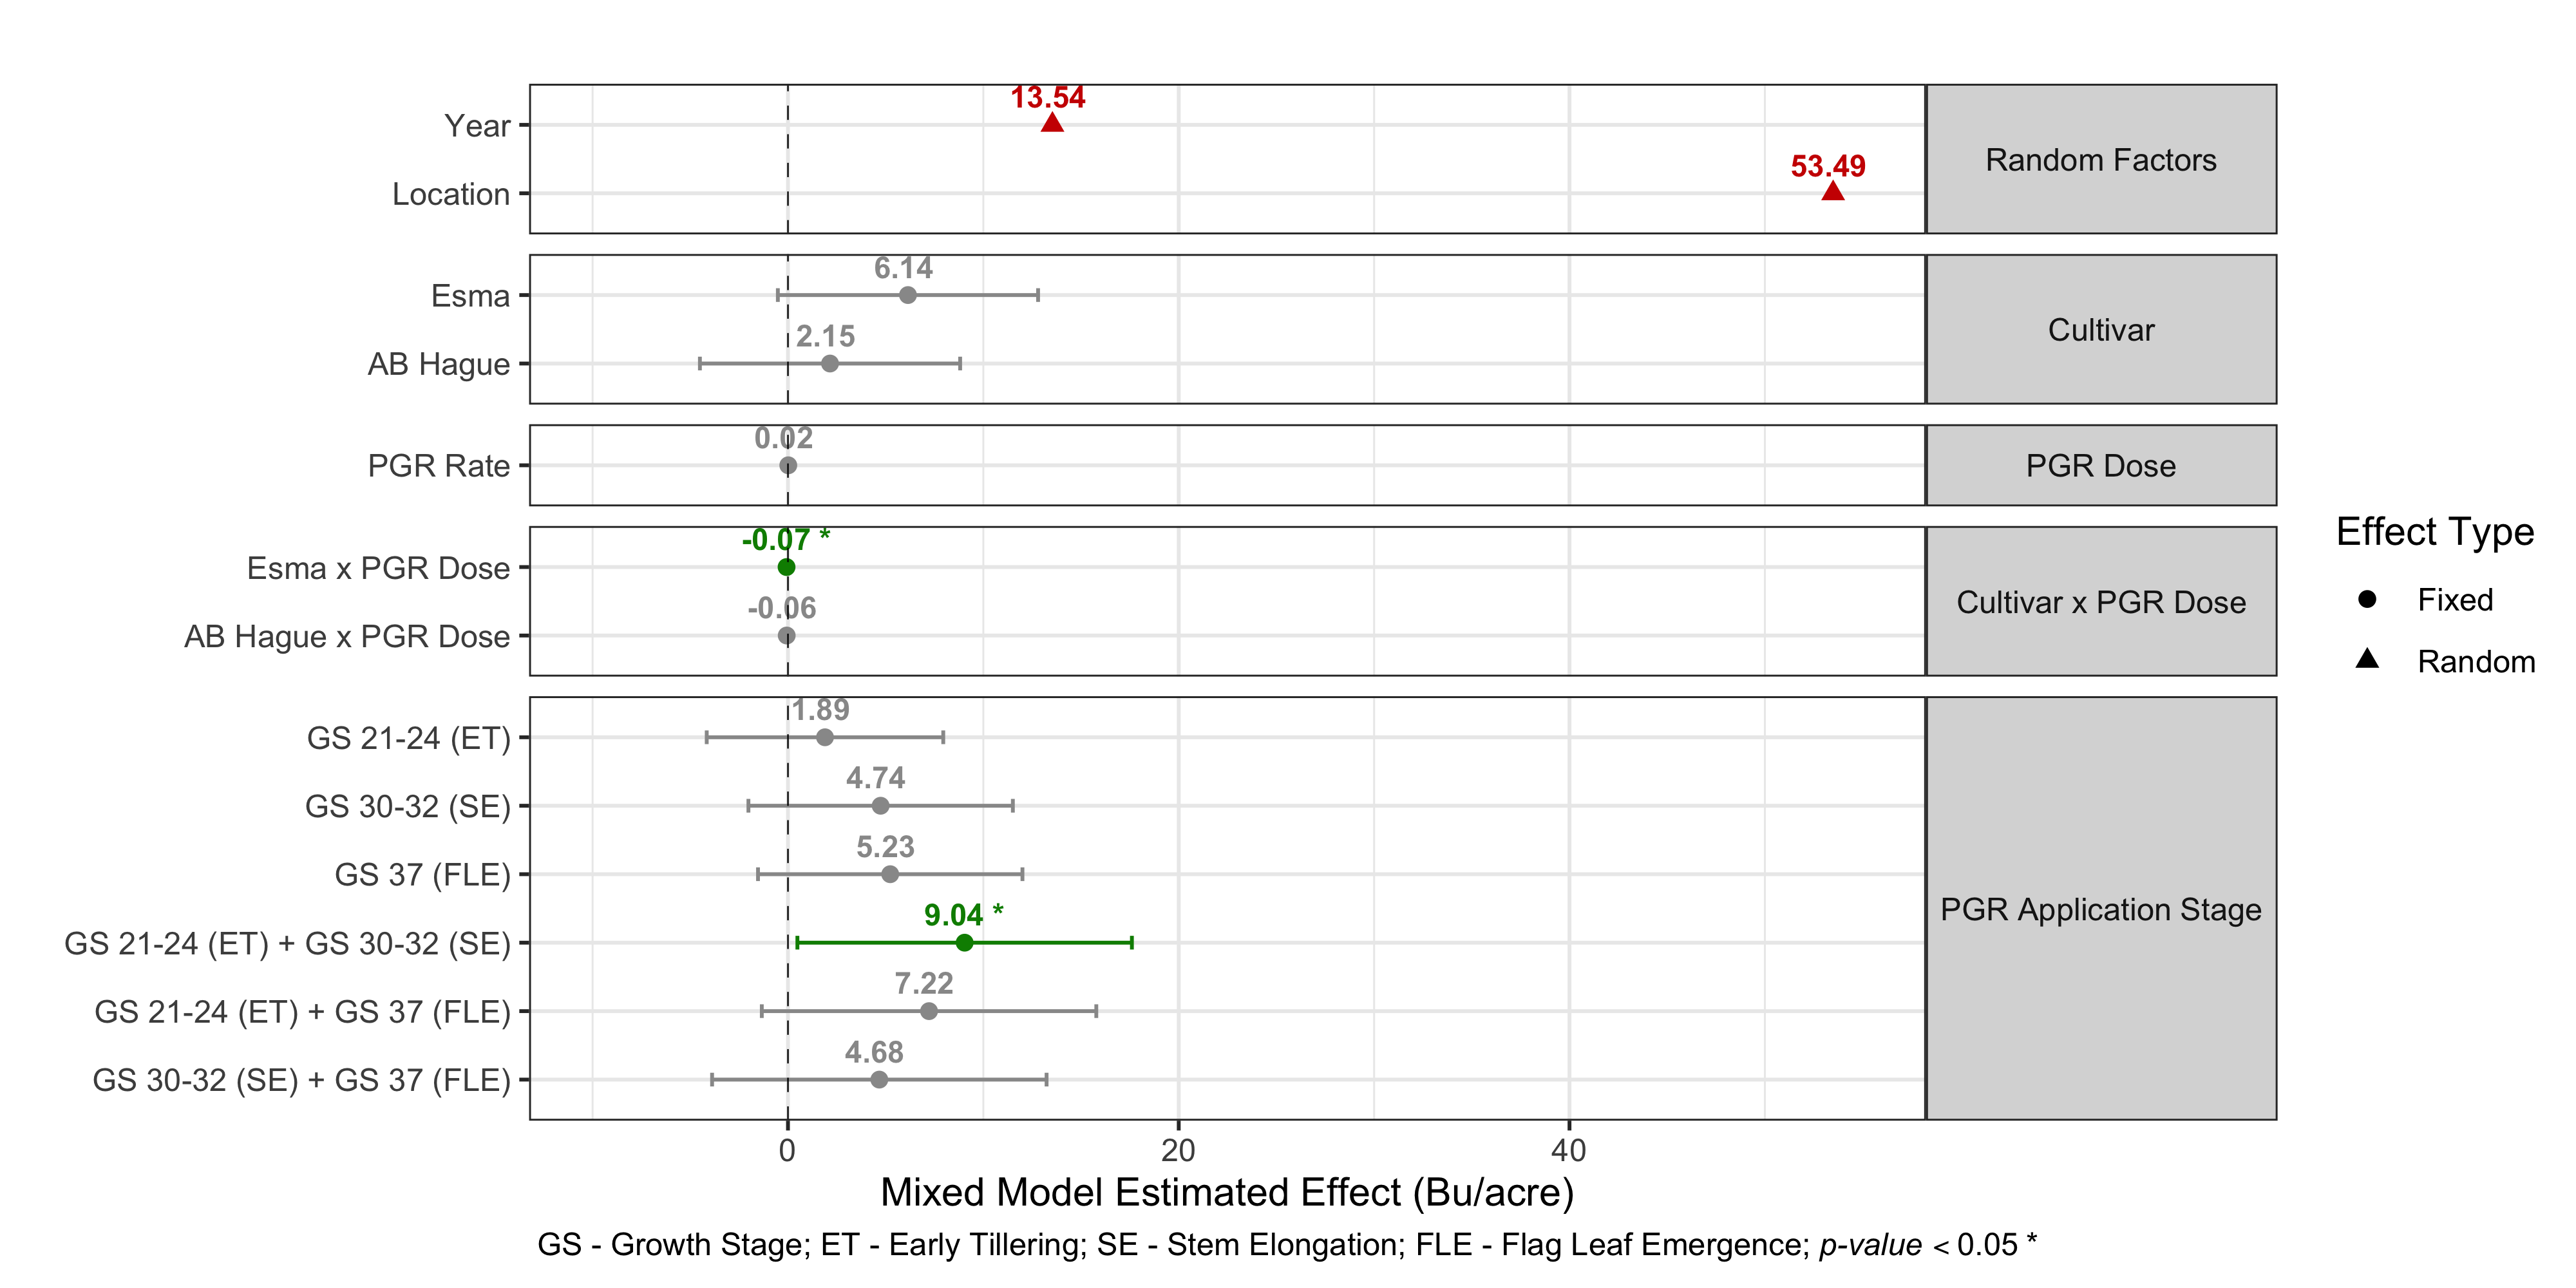

In [38]:
# Apply manual order to the "term" column for PGR treatments only
#model_results <- model_results %>%
# Plot with significance stars and confidence intervals
# Define custom order for PGR treatments
custom_order_2 <- c("Random Factors", 
                  "Year", 
                  "Cultivar",
                  "PGR Dose",
                  "Cultivar x PGR Dose",
                  "PGR Application Stage")

custom_order_3 <- c("GS 30-32 (SE) + GS 37 (FLE)",
                    "GS 21-24 (ET) + GS 37 (FLE)",
                     "GS 21-24 (ET) + GS 30-32 (SE)",
                     "GS 37 (FLE)",
                     "GS 30-32 (SE)", 
                    "GS 21-24 (ET)"
                  )

model_results <- model_results %>% 
  
  mutate(effect = recode(effect,
                         "fixed" = "Fixed"), 
         term = recode(term,
                       "year" = "Year",
                       "location" = "Location"),
    category = fct_relevel(category, custom_order_2),
         term = fct_relevel(term, custom_order_3))

options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 400)
ggplot(model_results, aes(x = estimate, y = term, shape = effect, color = significant_or_not)) +
  geom_point(size = 2) +
  geom_errorbarh(aes(xmin = ci_lower, xmax = ci_upper), height = 0.2) +  # Confidence intervals
  geom_text(aes(label = paste(round(estimate, 2), p_signif)), hjust = 0.5, vjust = -0.8, size = 3, fontface = "bold", show.legend = F) +  # Add estimate & p-value stars
  facet_grid(category ~., scales = "free_y", space = "free_y") +  # Group by category
  geom_vline(xintercept = 0, lwd = 0.2, linetype = "dashed") +  # Vertical line at zero
  scale_shape_manual(values = c(16, 17)) +  # Different shapes for fixed and random effects
  scale_color_manual(values = c("gray60", "red3", "green4")) +  # Different colors for fixed and random
  labs(title = "",
       x = "Mixed Model Estimated Effect (Bu/acre)", y = "", caption = expression("GS - Growth Stage; ET - Early Tillering; SE - Stem Elongation; FLE - Flag Leaf Emergence; " * italic("p-value") < 0.05 ~ "*"),
       shape = "Effect Type", color = "P-Value") +
 coord_cartesian(xlim = c(-10, 55))+
  theme_bw()+
  guides(color = "none")+
  theme(strip.text.y = element_text(angle = 0),
        plot.caption.position = "plot",  # ensures caption is treated as a plot component
    plot.caption = element_text(hjust = 0.5))
ggsave("figure/Yield_mixed_modeling_bu_ac.png", width = 8, height = 5, dpi = 600)

In [39]:
# Set a random seed for reproducibility
set.seed(123)

# Fit the mixed model with year & location as random effects
reg_mod_int_yield_kgha <- lmer(yield_adj_to_13_5_percent ~ cultivar * PGR_dose + PGR_growth_stage +
                (1 | year) + (1 | location), 
                data = data_int %>% mutate(pgr_trt_name = fct_relevel(pgr_trt_name, "No_PGR"),
                                       cultivar = fct_relevel(cultivar, "CDC_Austenson")))

# Extract fixed effects with p-values
fixed_effects <- broom.mixed::tidy(reg_mod_int_yield_kgha, effects = "fixed") %>%
  filter(term != "(Intercept)")

# Extract confidence intervals for fixed effects
conf_int <- confint(reg_mod_int_yield_kgha, method = "Wald") %>%  # Compute 95% CIs
  as.data.frame() %>%
  rownames_to_column("term") %>%
  filter(term %in% fixed_effects$term) %>%
  rename(ci_lower = `2.5 %`, ci_upper = `97.5 %`)

# Merge CIs with fixed effects
fixed_effects <- fixed_effects %>%
  left_join(conf_int, by = "term") %>%
  mutate(
    p_signif = case_when(
      p.value < 0.001 ~ "***",
      p.value < 0.01  ~ "**",
      p.value < 0.05  ~ "*",
      TRUE ~ ""
    )
  )

# Extract random effects (variance components) - No p-values here
random_effects <- broom.mixed::tidy(reg_mod_int_yield_kgha, effects = "ran_pars") %>%
  select(-term) %>% 
  rename(term = group) %>% 
  mutate(
    term = str_replace(term, "sd__", ""),  # Clean term names
    effect = "Random",
    p_signif = "",  # No p-values for random effects
    ci_lower = NA,  # No CIs for random effects
    ci_upper = NA
  )

# Combine fixed and random effects
model_results <- bind_rows(fixed_effects, random_effects)

# Assign grouping categories
model_results <- model_results %>%
  filter(term != "Residual") %>%
  mutate(category = case_when(
    grepl("location", term) ~ "Random Factors",
    grepl("year", term) ~ "Random Factors",
    term %in% c("cultivarAB_Hague", "cultivarEsma") ~ "Cultivar",
    term == "PGR_dose" ~ "PGR Dose",
    term %in% c("cultivarAB_Hague:PGR_dose", "cultivarEsma:PGR_dose", "cultivarCDC_Austenson:PGR_dose") ~ "Cultivar x PGR Dose",
    grepl("PGR_growth_stage", term) ~ "PGR Application Stage",
    TRUE ~ "Other"
  )) %>% 
  mutate(category = fct_relevel(category, "Random Factors"),  # Convert to factor for correct order
         significant_or_not = case_when(p.value < 0.05 ~ "Significant",
                                        p.value >= 0.05 ~ "Not Significant",
                                        .default = "other"
           
         )) %>% 
  mutate(term = case_when(
    term == "cultivarAB_Hague" ~ "AB Hague",
     term == "cultivarEsma" ~ "Esma",
    term == "PGR_dose" ~ "PGR Rate",
    term == "cultivarAB_Hague:PGR_dose" ~ "AB Hague x PGR Dose",
    term == "cultivarEsma:PGR_dose" ~ "Esma x PGR Dose",
    term == "cultivarCDC_Austenson:PGR_dose" ~ "CDC Austenson x PGR Dose",
    term == "PGR_growth_stageGS 21-24 (ET)" ~ "GS 21-24 (ET)",
    term == "PGR_growth_stageGS 21-24 (ET) + GS 37 (FLE)" ~ "GS 21-24 (ET) + GS 37 (FLE)",
    term == "PGR_growth_stageGS 21-24 (ET) + GS 30-32 (SE)" ~ "GS 21-24 (ET) + GS 30-32 (SE)",
    term == "PGR_growth_stageGS 37 (FLE)" ~ "GS 37 (FLE)",
    term == "PGR_growth_stageGS 30-32 (SE)" ~ "GS 30-32 (SE)",
    term == "PGR_growth_stageGS 30-32 (SE) + GS 37 (FLE)" ~ "GS 30-32 (SE) + GS 37 (FLE)",
    TRUE ~ term
  )) 



Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `category = fct_relevel(category, custom_order_2)`.
Caused by warning:
! 1 unknown level in `f`: Year”
`height` was translated to `width`.
`height` was translated to `width`.


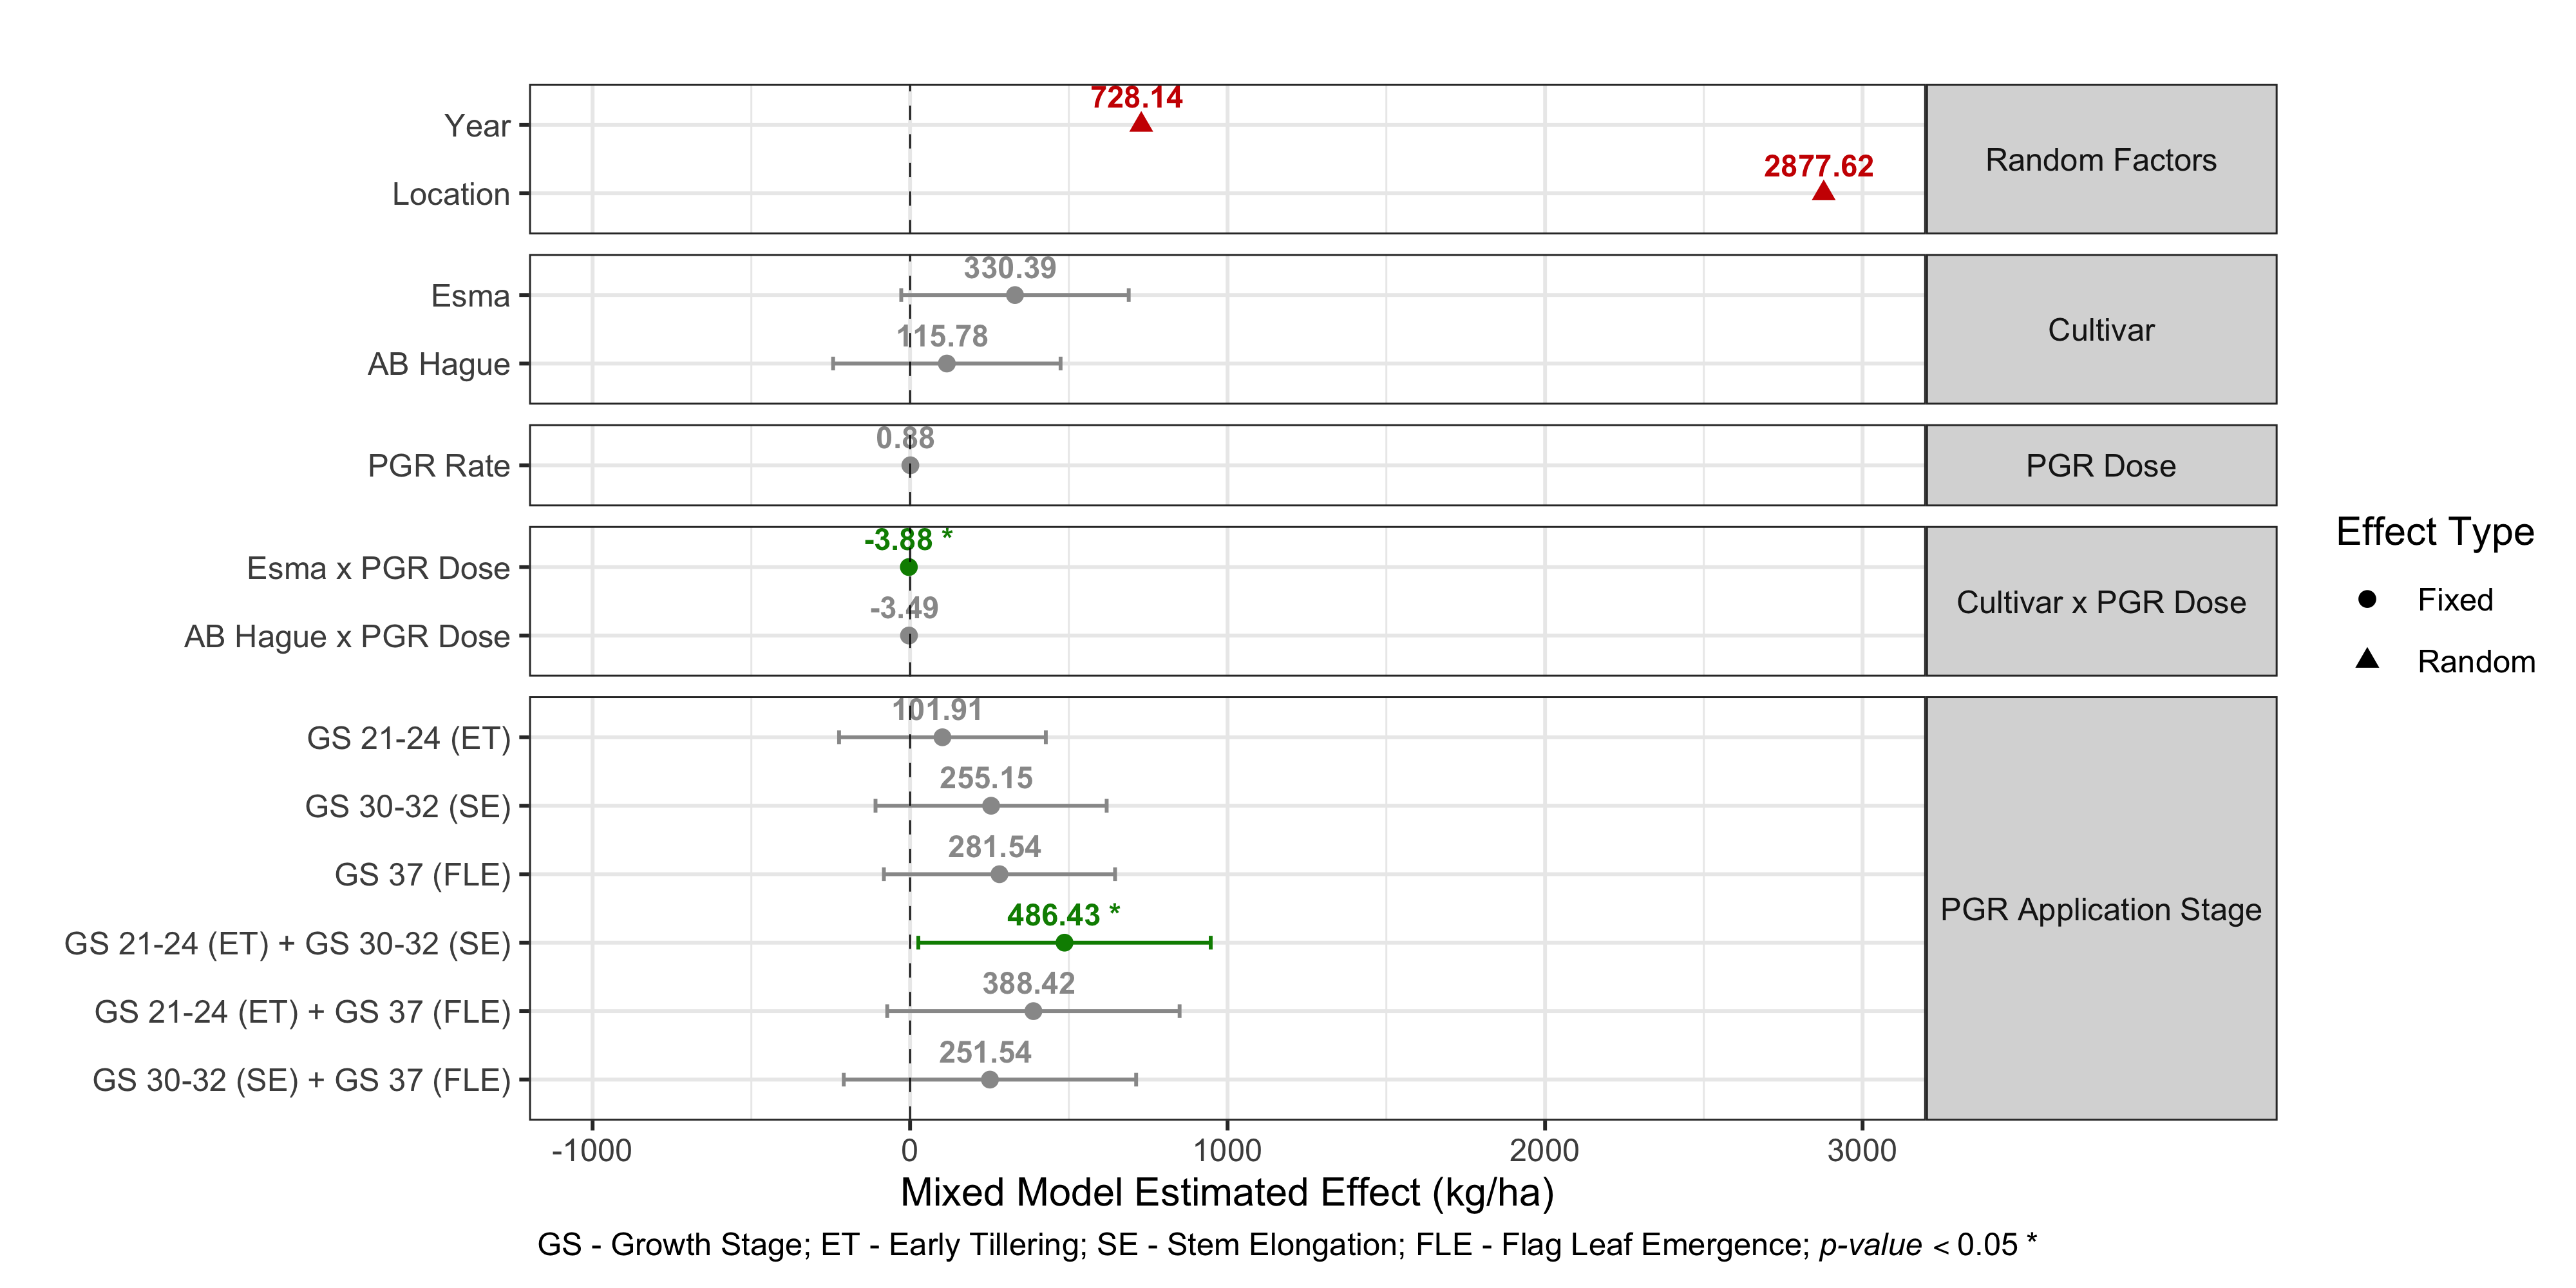

In [40]:
# Apply manual order to the "term" column for PGR treatments only
#model_results <- model_results %>%
# Plot with significance stars and confidence intervals
# Define custom order for PGR treatments
custom_order_2 <- c("Random Factors", 
                  "Year", 
                  "Cultivar",
                  "PGR Dose",
                  "Cultivar x PGR Dose",
                  "PGR Application Stage")

custom_order_3 <- c("GS 30-32 (SE) + GS 37 (FLE)",
                    "GS 21-24 (ET) + GS 37 (FLE)",
                     "GS 21-24 (ET) + GS 30-32 (SE)",
                     "GS 37 (FLE)",
                     "GS 30-32 (SE)", 
                    "GS 21-24 (ET)"
                  )

model_results <- model_results %>% 
  
  mutate(effect = recode(effect,
                         "fixed" = "Fixed"), 
         term = recode(term,
                       "year" = "Year",
                       "location" = "Location"),
    category = fct_relevel(category, custom_order_2),
         term = fct_relevel(term, custom_order_3))
ggplot(model_results, aes(x = estimate, y = term, shape = effect, color = significant_or_not)) +
  geom_point(size = 2) +
  geom_errorbarh(aes(xmin = ci_lower, xmax = ci_upper), height = 0.2) +  # Confidence intervals
  geom_text(aes(label = paste(round(estimate, 2), p_signif)), hjust = 0.5, vjust = -0.8, size = 3, fontface = "bold", show.legend = F) +  # Add estimate & p-value stars
  facet_grid(category ~., scales = "free_y", space = "free_y") +  # Group by category
  geom_vline(xintercept = 0, lwd = 0.2, linetype = "dashed") +  # Vertical line at zero
  scale_shape_manual(values = c(16, 17)) +  # Different shapes for fixed and random effects
  scale_color_manual(values = c("gray60", "red3", "green4")) +  # Different colors for fixed and random
  labs(title = "",
       x = "Mixed Model Estimated Effect (kg/ha)", y = "", caption = expression("GS - Growth Stage; ET - Early Tillering; SE - Stem Elongation; FLE - Flag Leaf Emergence; " * italic("p-value") < 0.05 ~ "*"),
       shape = "Effect Type", color = "P-Value") +
  coord_cartesian(xlim = c(-1000, 3000))+
  theme_bw()+
  guides(color = "none")+
  theme(strip.text.y = element_text(angle = 0),
        plot.caption.position = "plot",  # ensures caption is treated as a plot component
    plot.caption = element_text(hjust = 0.5))
ggsave("figure/Yield_interac_mixed_modeling_kg_ha.png", width = 8, height = 5, dpi = 600)

# Economic analysis

In [41]:
data_int_economic1 <- data_int %>% 
  filter(!(location == "Vermilion" & net_return > 1500)) %>% 
  filter(!(location == "Falher" & net_return > 1100)) 
# Set a random seed for reproducibility
set.seed(123)

# Fit the mixed model with year & location as random effects
reg_mod_int_yield_economic <- lmer(net_return ~ cultivar * PGR_dose + PGR_growth_stage +
                (1 | year) + (1 | location), 
                data = data_int_economic1 %>% mutate(pgr_trt_name = fct_relevel(pgr_trt_name, "No_PGR"),
                                       cultivar = fct_relevel(cultivar, "CDC_Austenson")))

# Extract fixed effects with p-values
fixed_effects <- broom.mixed::tidy(reg_mod_int_yield_economic, effects = "fixed") %>%
  filter(term != "(Intercept)")

# Extract confidence intervals for fixed effects
conf_int <- confint(reg_mod_int_yield_economic, method = "Wald", level = 0.95) %>%  # Compute 95% CIs
  as.data.frame() %>%
  rownames_to_column("term") %>%
  filter(term %in% fixed_effects$term) %>%
  rename(ci_lower = `2.5 %`, ci_upper = `97.5 %`)

# Merge CIs with fixed effects
fixed_effects <- fixed_effects %>%
  left_join(conf_int, by = "term") %>%
  mutate(
    p_signif = case_when(
      p.value < 0.001 ~ "***",
      p.value < 0.01  ~ "**",
      p.value < 0.05  ~ "*",
      TRUE ~ ""
    )
  )

# Extract random effects (variance components) - No p-values here
random_effects <- broom.mixed::tidy(reg_mod_int_yield_economic, effects = "ran_pars") %>%
  select(-term) %>% 
  rename(term = group) %>% 
  mutate(
    term = str_replace(term, "sd__", ""),  # Clean term names
    effect = "Random",
    p_signif = "",  # No p-values for random effects
    ci_lower = NA,  # No CIs for random effects
    ci_upper = NA
  )

# Combine fixed and random effects
model_results <- bind_rows(fixed_effects, random_effects)

# Assign grouping categories
model_results <- model_results %>%
  filter(term != "Residual") %>%
  mutate(category = case_when(
    grepl("location", term) ~ "Random Factors",
    grepl("year", term) ~ "Random Factors",
    term %in% c("cultivarAB_Hague", "cultivarEsma") ~ "Cultivar",
    term == "PGR_dose" ~ "PGR Dose",
    term %in% c("cultivarAB_Hague:PGR_dose", "cultivarEsma:PGR_dose", "cultivarCDC_Austenson:PGR_dose") ~ "Cultivar x PGR Dose",
    grepl("PGR_growth_stage", term) ~ "PGR Application Stage",
    TRUE ~ "Other"
  )) %>% 
  mutate(category = fct_relevel(category, "Random Factors"),  # Convert to factor for correct order
         significant_or_not = case_when(p.value < 0.05 ~ "Significant",
                                        p.value >= 0.05 ~ "Not Significant",
                                        .default = "other"
           
         )) %>% 
  mutate(term = case_when(
    term == "cultivarAB_Hague" ~ "AB Hague",
     term == "cultivarEsma" ~ "Esma",
    term == "PGR_dose" ~ "PGR Rate",
    term == "cultivarAB_Hague:PGR_dose" ~ "AB Hague x PGR Dose",
    term == "cultivarEsma:PGR_dose" ~ "Esma x PGR Dose",
    term == "cultivarCDC_Austenson:PGR_dose" ~ "CDC Austenson x PGR Dose",
    term == "PGR_growth_stageGS 21-24 (ET)" ~ "GS 21-24 (ET)",
    term == "PGR_growth_stageGS 21-24 (ET) + GS 37 (FLE)" ~ "GS 21-24 (ET) + GS 37 (FLE)",
    term == "PGR_growth_stageGS 21-24 (ET) + GS 30-32 (SE)" ~ "GS 21-24 (ET) + GS 30-32 (SE)",
    term == "PGR_growth_stageGS 37 (FLE)" ~ "GS 37 (FLE)",
    term == "PGR_growth_stageGS 30-32 (SE)" ~ "GS 30-32 (SE)",
    term == "PGR_growth_stageGS 30-32 (SE) + GS 37 (FLE)" ~ "GS 30-32 (SE) + GS 37 (FLE)",
    TRUE ~ term
  )) 


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `category = fct_relevel(category, custom_order_2)`.
Caused by warning:
! 1 unknown level in `f`: Year”
`height` was translated to `width`.
`height` was translated to `width`.


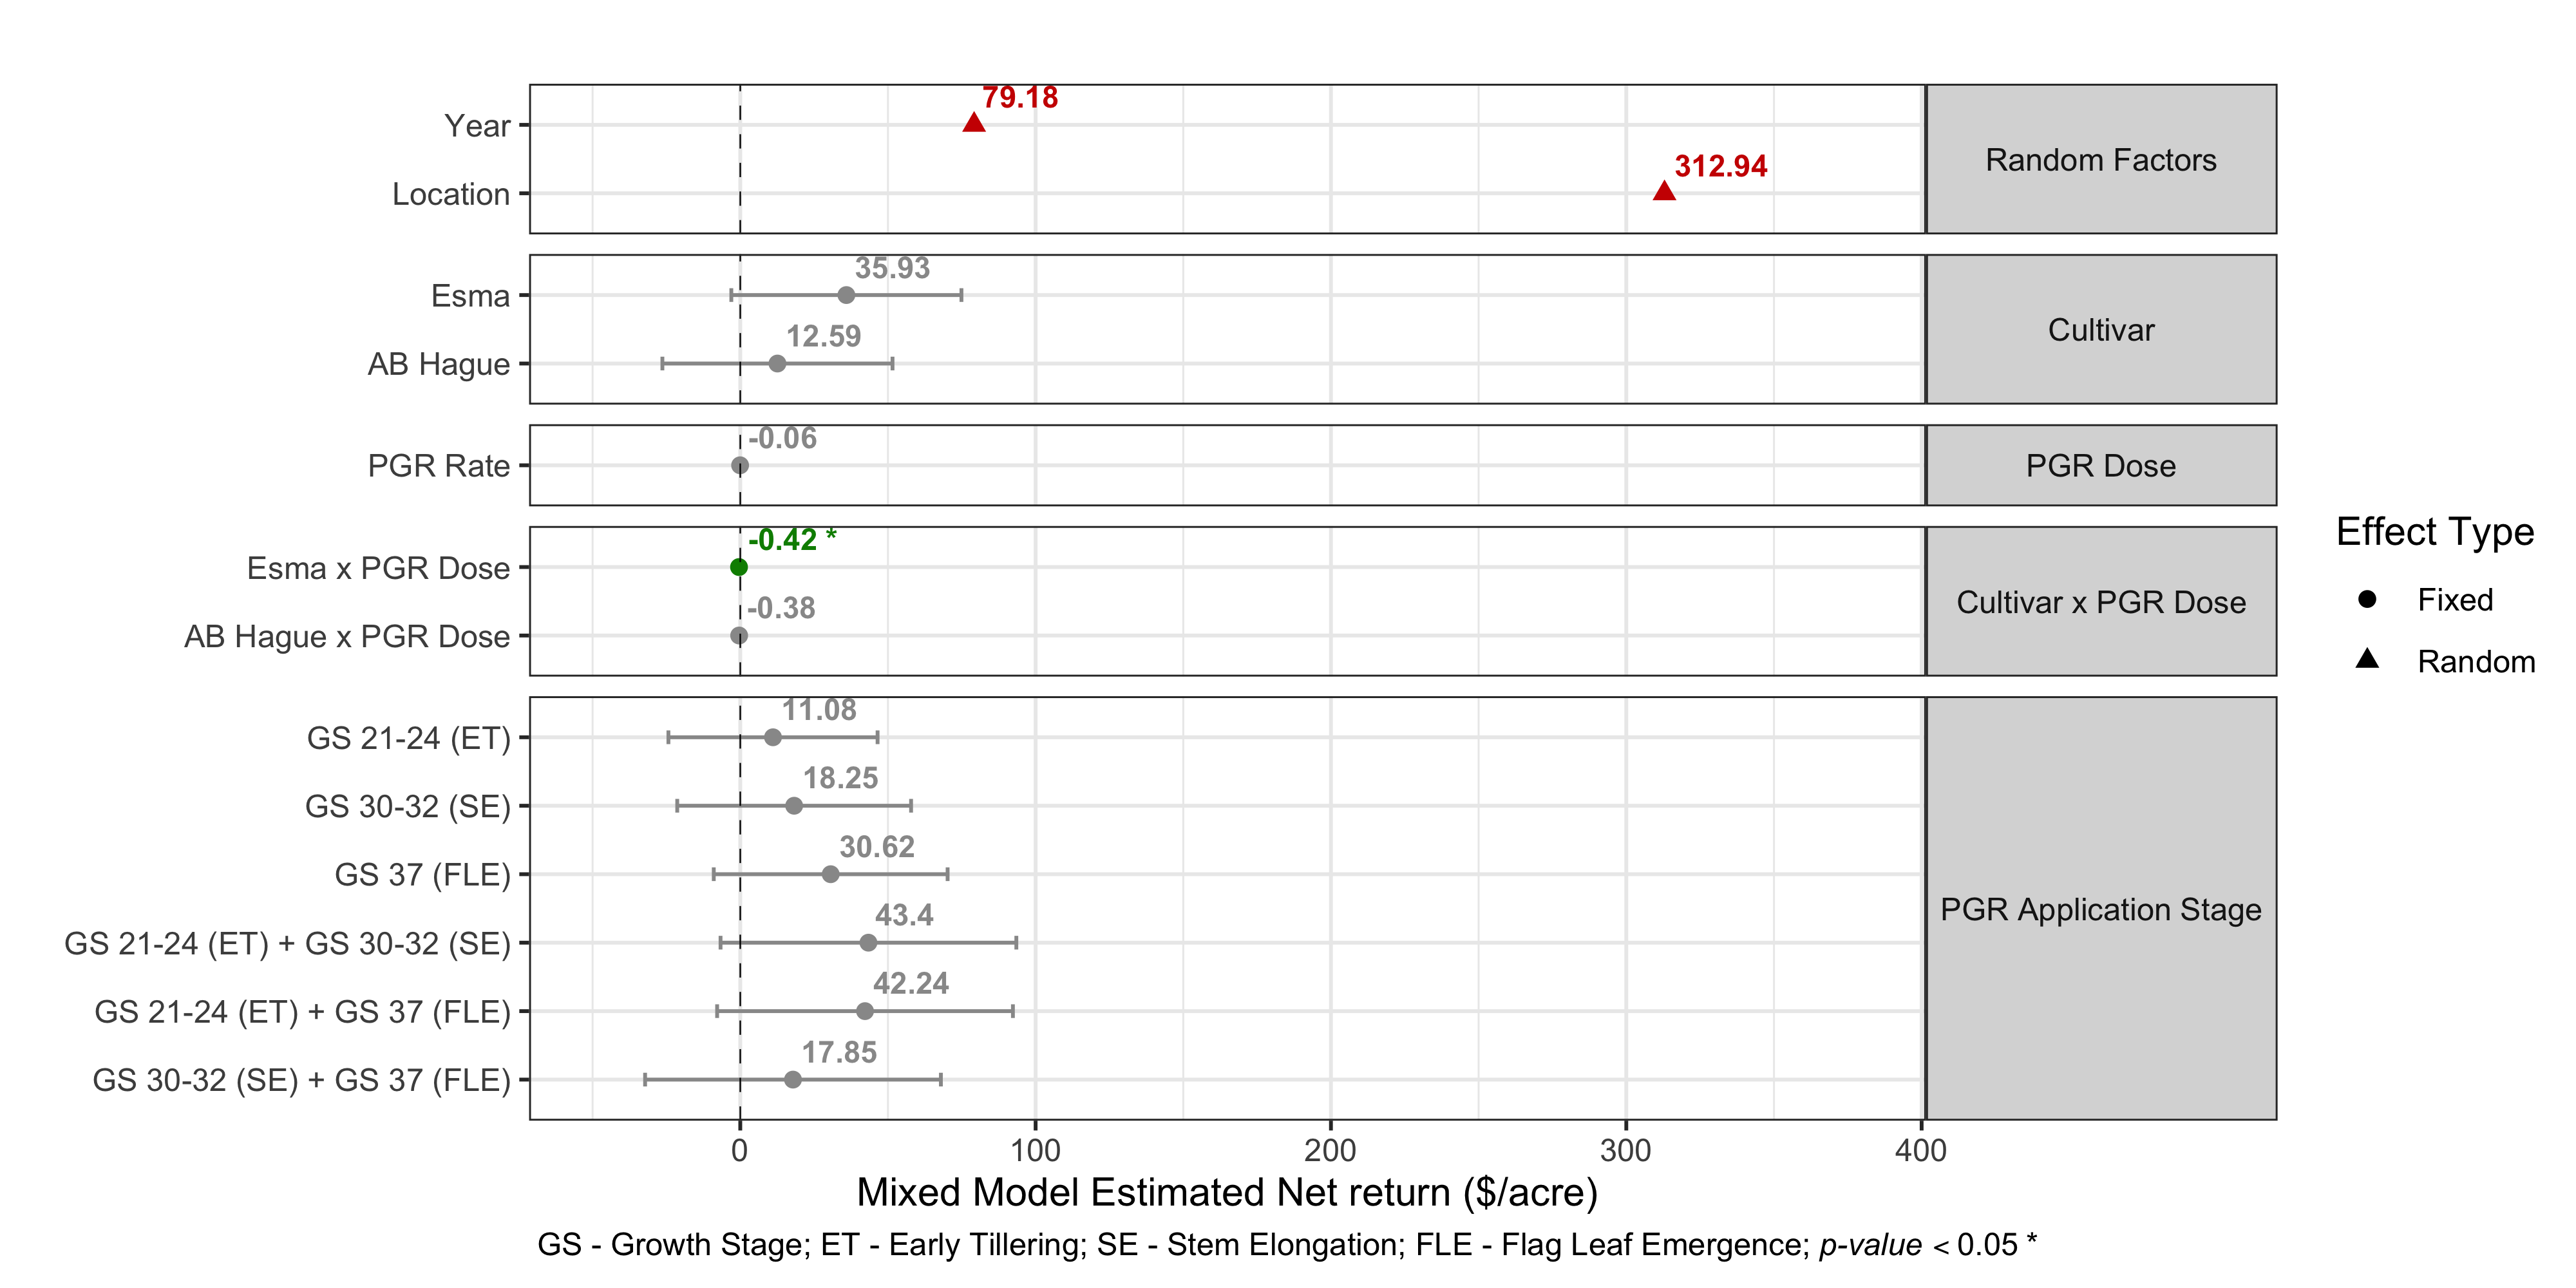

In [42]:
# Apply manual order to the "term" column for PGR treatments only
#model_results <- model_results %>%
# Plot with significance stars and confidence intervals
# Define custom order for PGR treatments
custom_order_2 <- c("Random Factors", 
                  "Year", 
                  "Cultivar",
                  "PGR Dose",
                  "Cultivar x PGR Dose",
                  "PGR Application Stage")

custom_order_3 <- c("GS 30-32 (SE) + GS 37 (FLE)",
                    "GS 21-24 (ET) + GS 37 (FLE)",
                     "GS 21-24 (ET) + GS 30-32 (SE)",
                     "GS 37 (FLE)",
                     "GS 30-32 (SE)", 
                    "GS 21-24 (ET)"
                  )

model_results <- model_results %>% 
  
  mutate(effect = recode(effect,
                         "fixed" = "Fixed"), 
         term = recode(term,
                       "year" = "Year",
                       "location" = "Location"),
    category = fct_relevel(category, custom_order_2),
         term = fct_relevel(term, custom_order_3))
ggplot(model_results, aes(x = estimate, y = term, shape = effect, color = significant_or_not)) +
  geom_point(size = 2) +
  geom_errorbarh(aes(xmin = ci_lower, xmax = ci_upper), height = 0.2) +  # Confidence intervals
  geom_text(aes(label = paste(round(estimate, 2), p_signif)), hjust = -0.1, vjust = -0.8, size = 3, fontface = "bold", show.legend = F) +  # Add estimate & p-value stars
  facet_grid(category ~., scales = "free_y", space = "free_y") +  # Group by category
  geom_vline(xintercept = 0, lwd = 0.2, linetype = "dashed") +  # Vertical line at zero
  scale_shape_manual(values = c(16, 17)) +  # Different shapes for fixed and random effects
  scale_color_manual(values = c("gray60", "red3", "green4")) +  # Different colors for fixed and random
  labs(title = "",
       x = "Mixed Model Estimated Net return ($/acre)", y = "", caption = expression("GS - Growth Stage; ET - Early Tillering; SE - Stem Elongation; FLE - Flag Leaf Emergence; " * italic("p-value") < 0.05 ~ "*"),
       shape = "Effect Type", color = "P-Value") +
  coord_cartesian(xlim = c(-50, 380))+
  theme_bw()+
  guides(color = "none")+
  theme(strip.text.y = element_text(angle = 0),
        plot.caption.position = "plot",  # ensures caption is treated as a plot component
    plot.caption = element_text(hjust = 0.5))
ggsave("figure/Yield_mixed_modeling_bu_ac.png", width = 8, height = 5, dpi = 600)